<a href="https://colab.research.google.com/github/Remonah-3/Github_Assignment/blob/master/Home_price_forecasts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

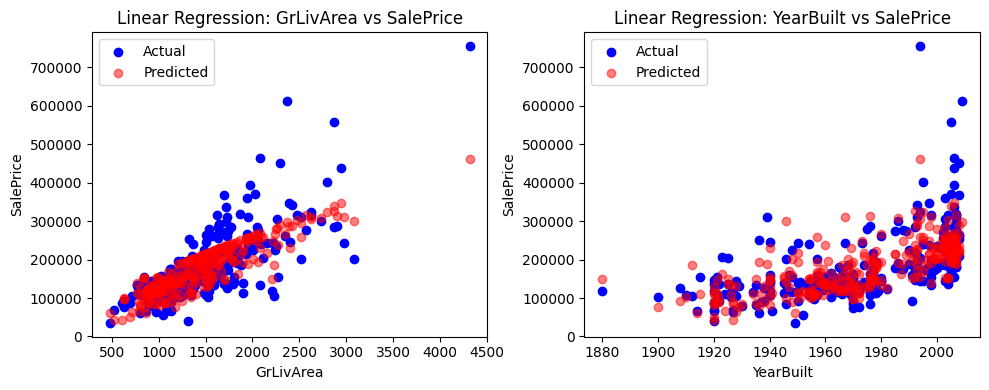

Model comparison (2 features):
               Model           MSE        R2
0  Linear Regression  2.495555e+09  0.674648
1                SVM  7.842026e+09 -0.022385
2      Decision Tree  2.184046e+09  0.715260
3      Random Forest  1.546712e+09  0.798351
------------------------------------------------------------


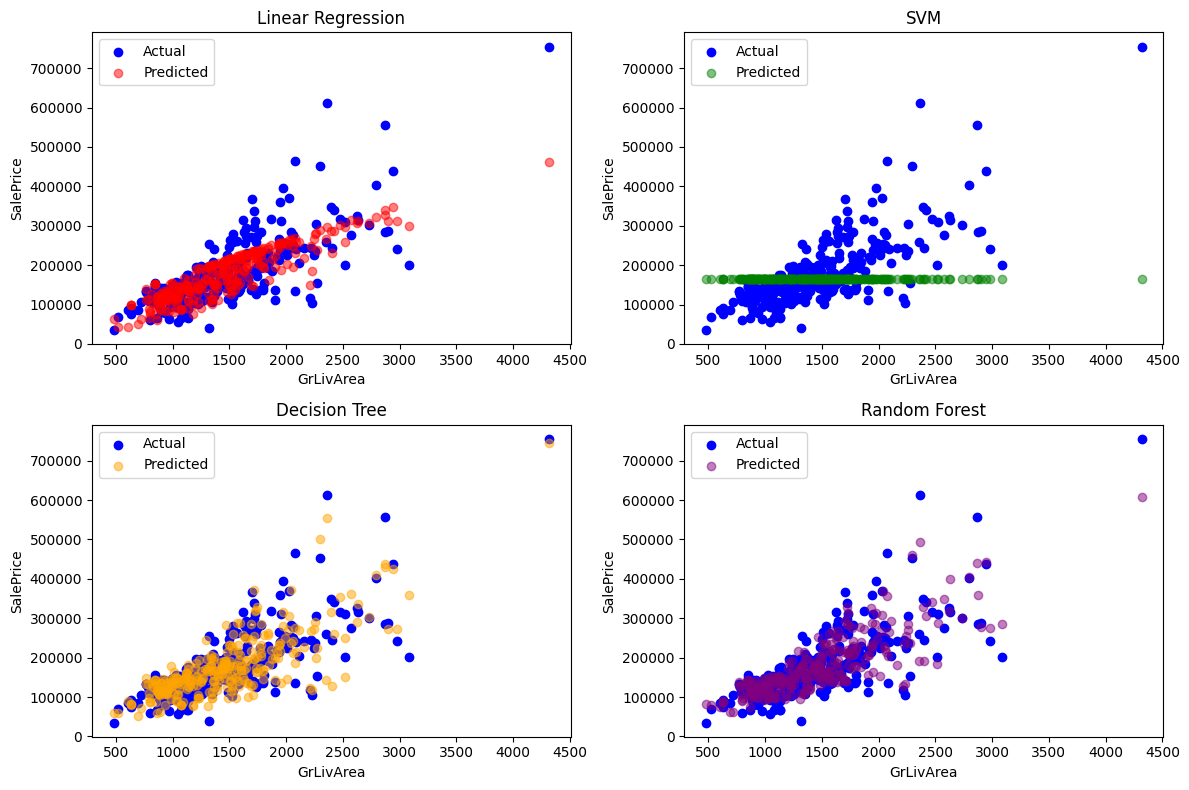

Advanced Feature Comparison:
               Model           MSE        R2
0  Linear Regression  1.576963e+09  0.794407
1                SVM  7.845528e+09 -0.022842
2      Decision Tree  1.705884e+09  0.777599
3      Random Forest  8.392407e+08  0.890586
------------------------------------------------------------


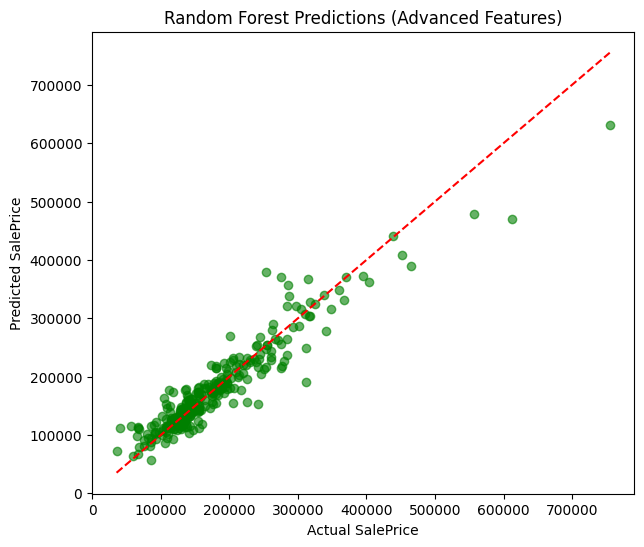

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = pd.read_csv("train.csv")
print(data.head())

# Simple model with 2 features (GrLivArea, YearBuilt)
features_simple = ['GrLivArea', 'YearBuilt']
X_simple = data[features_simple].fillna(data[features_simple].median())
y_simple = data['SalePrice']

# Split train/test
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(
    X_simple, y_simple, test_size=0.2, random_state=42
)


# Linear Regression (2 features)
lr = LinearRegression()
lr.fit(X_train_simple, y_train_simple)
y_pred_lr = lr.predict(X_test_simple)

mse_lr = mean_squared_error(y_test_simple, y_pred_lr)
r2_lr = r2_score(y_test_simple, y_pred_lr)
print("Linear Regression (2 features)")
print("MSE:", mse_lr)
print("R2:", r2_lr)
print("-"*40)

# Visualization
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(X_test_simple['GrLivArea'], y_test_simple, color='blue', label='Actual')
plt.scatter(X_test_simple['GrLivArea'], y_pred_lr, color='red', alpha=0.5, label='Predicted')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('Linear Regression: GrLivArea vs SalePrice')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(X_test_simple['YearBuilt'], y_test_simple, color='blue', label='Actual')
plt.scatter(X_test_simple['YearBuilt'], y_pred_lr, color='red', alpha=0.5, label='Predicted')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.title('Linear Regression: YearBuilt vs SalePrice')
plt.legend()
plt.tight_layout()
plt.show()

# Compare four models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_simple)
X_test_scaled = scaler.transform(X_test_simple)

# Train models
lr = LinearRegression().fit(X_train_simple, y_train_simple)
svm = SVR().fit(X_train_scaled, y_train_simple)
dt = DecisionTreeRegressor(random_state=42).fit(X_train_simple, y_train_simple)
rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train_simple, y_train_simple)

# Predictions
y_pred_lr = lr.predict(X_test_simple)
y_pred_svm = svm.predict(X_test_scaled)
y_pred_dt = dt.predict(X_test_simple)
y_pred_rf = rf.predict(X_test_simple)

# Evaluate
results_simple = pd.DataFrame({
    'Model': ['Linear Regression', 'SVM', 'Decision Tree', 'Random Forest'],
    'MSE': [
        mean_squared_error(y_test_simple, y_pred_lr),
        mean_squared_error(y_test_simple, y_pred_svm),
        mean_squared_error(y_test_simple, y_pred_dt),
        mean_squared_error(y_test_simple, y_pred_rf)
    ],
    'R2': [
        r2_score(y_test_simple, y_pred_lr),
        r2_score(y_test_simple, y_pred_svm),
        r2_score(y_test_simple, y_pred_dt),
        r2_score(y_test_simple, y_pred_rf)
    ]
})
print("Model comparison (2 features):")
print(results_simple)
print("-"*60)

# Visualization
plt.figure(figsize=(12,8))
models = ['Linear Regression','SVM','Decision Tree','Random Forest']
preds = [y_pred_lr, y_pred_svm, y_pred_dt, y_pred_rf]
colors = ['red','green','orange','purple']

for i, (m, ypred, c) in enumerate(zip(models, preds, colors), 1):
    plt.subplot(2,2,i)
    plt.scatter(X_test_simple['GrLivArea'], y_test_simple, color='blue', label='Actual')
    plt.scatter(X_test_simple['GrLivArea'], ypred, color=c, alpha=0.5, label='Predicted')
    plt.title(m)
    plt.xlabel('GrLivArea')
    plt.ylabel('SalePrice')
    plt.legend()

plt.tight_layout()
plt.show()

# Advanced model with more features
selected_features = ['GrLivArea','YearBuilt','OverallQual','GarageCars','TotalBsmtSF','FullBath']
X_adv = data[selected_features].fillna(data[selected_features].median())
y_adv = data['SalePrice']

X_train_adv, X_test_adv, y_train_adv, y_test_adv = train_test_split(
    X_adv, y_adv, test_size=0.2, random_state=42
)

scaler_adv = StandardScaler()
X_train_adv_scaled = scaler_adv.fit_transform(X_train_adv)
X_test_adv_scaled = scaler_adv.transform(X_test_adv)

# Train advanced models
lr_adv = LinearRegression().fit(X_train_adv, y_train_adv)
svm_adv = SVR().fit(X_train_adv_scaled, y_train_adv)
dt_adv = DecisionTreeRegressor(random_state=42).fit(X_train_adv, y_train_adv)
rf_adv = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train_adv, y_train_adv)

# Predictions
y_pred_lr_adv = lr_adv.predict(X_test_adv)
y_pred_svm_adv = svm_adv.predict(X_test_adv_scaled)
y_pred_dt_adv = dt_adv.predict(X_test_adv)
y_pred_rf_adv = rf_adv.predict(X_test_adv)

# Evaluate
results_adv = pd.DataFrame({
    'Model': ['Linear Regression', 'SVM', 'Decision Tree', 'Random Forest'],
    'MSE': [
        mean_squared_error(y_test_adv, y_pred_lr_adv),
        mean_squared_error(y_test_adv, y_pred_svm_adv),
        mean_squared_error(y_test_adv, y_pred_dt_adv),
        mean_squared_error(y_test_adv, y_pred_rf_adv)
    ],
    'R2': [
        r2_score(y_test_adv, y_pred_lr_adv),
        r2_score(y_test_adv, y_pred_svm_adv),
        r2_score(y_test_adv, y_pred_dt_adv),
        r2_score(y_test_adv, y_pred_rf_adv)
    ]
})
print("Advanced Feature Comparison:")
print(results_adv)
print("-"*60)

# Visualization (Random Forest example)
plt.figure(figsize=(7,6))
plt.scatter(y_test_adv, y_pred_rf_adv, color='green', alpha=0.6)
plt.plot([y_test_adv.min(), y_test_adv.max()], [y_test_adv.min(), y_test_adv.max()], 'r--')
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Random Forest Predictions (Advanced Features)")
plt.show()
